<a href="https://colab.research.google.com/github/thevanshiikaa/AIplantdoctor/blob/main/trafficsignrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [26]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [27]:
import kagglehub

# Download dataset (returns local path)
dataset_path = kagglehub.dataset_download(
    "meowmeowmeowmeowmeow/gtsrb-german-traffic-sign"
)

print("Dataset downloaded at:", dataset_path)


Using Colab cache for faster access to the 'gtsrb-german-traffic-sign' dataset.
Dataset downloaded at: /kaggle/input/gtsrb-german-traffic-sign


In [28]:
import os
os.listdir(dataset_path)


['Meta',
 'meta',
 'Meta.csv',
 'Train.csv',
 'Test.csv',
 'Test',
 'test',
 'Train',
 'train']

In [29]:
import os

# Update train_path and test_path to point to the directories within the downloaded dataset
train_path = os.path.join(dataset_path, 'Train')
test_path = os.path.join(dataset_path, 'Test')

NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [30]:
#label overview

classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}


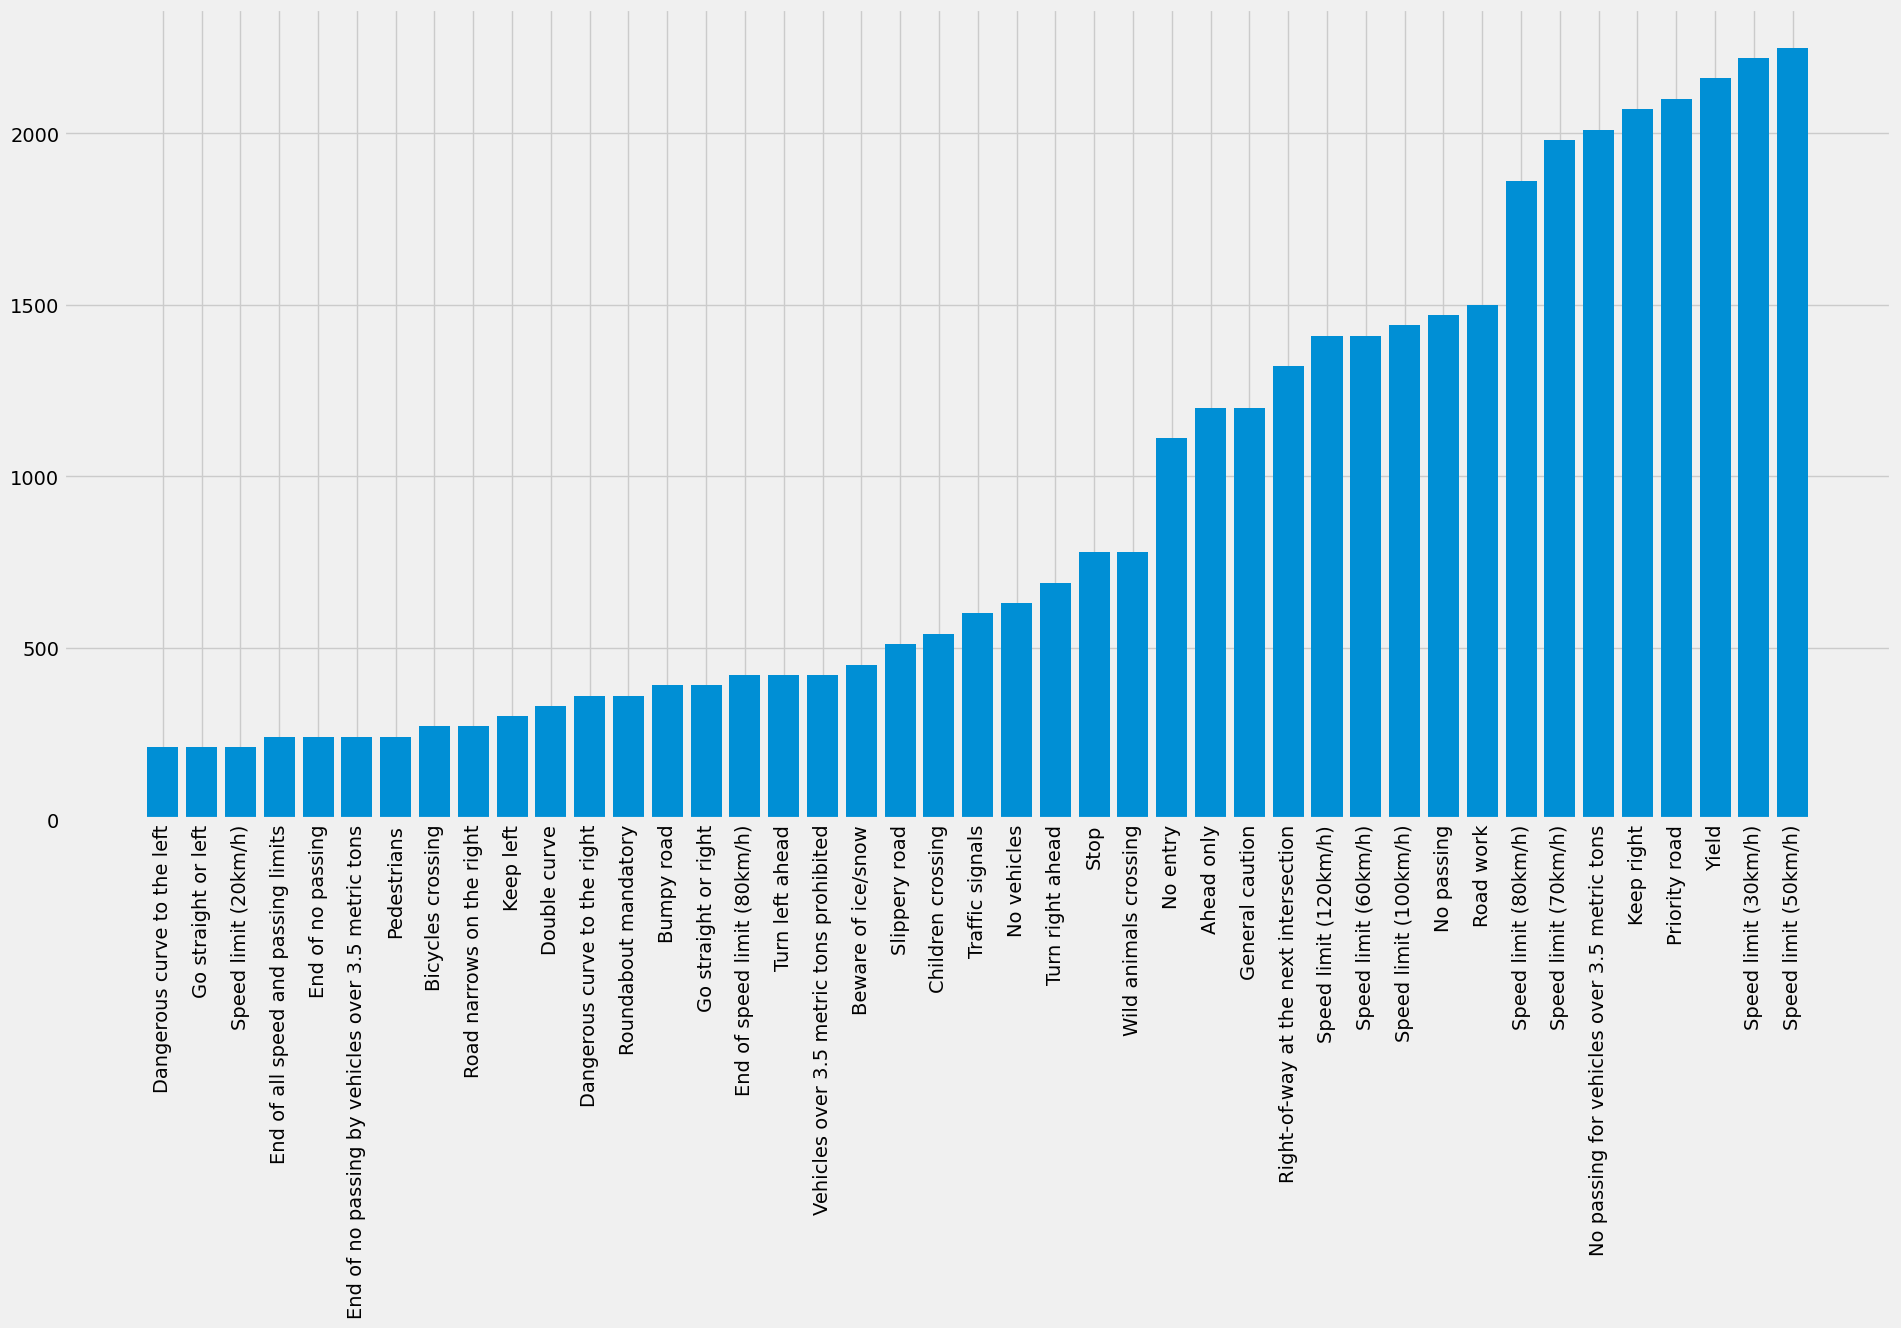

In [31]:
#Visualizing The Dataset
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

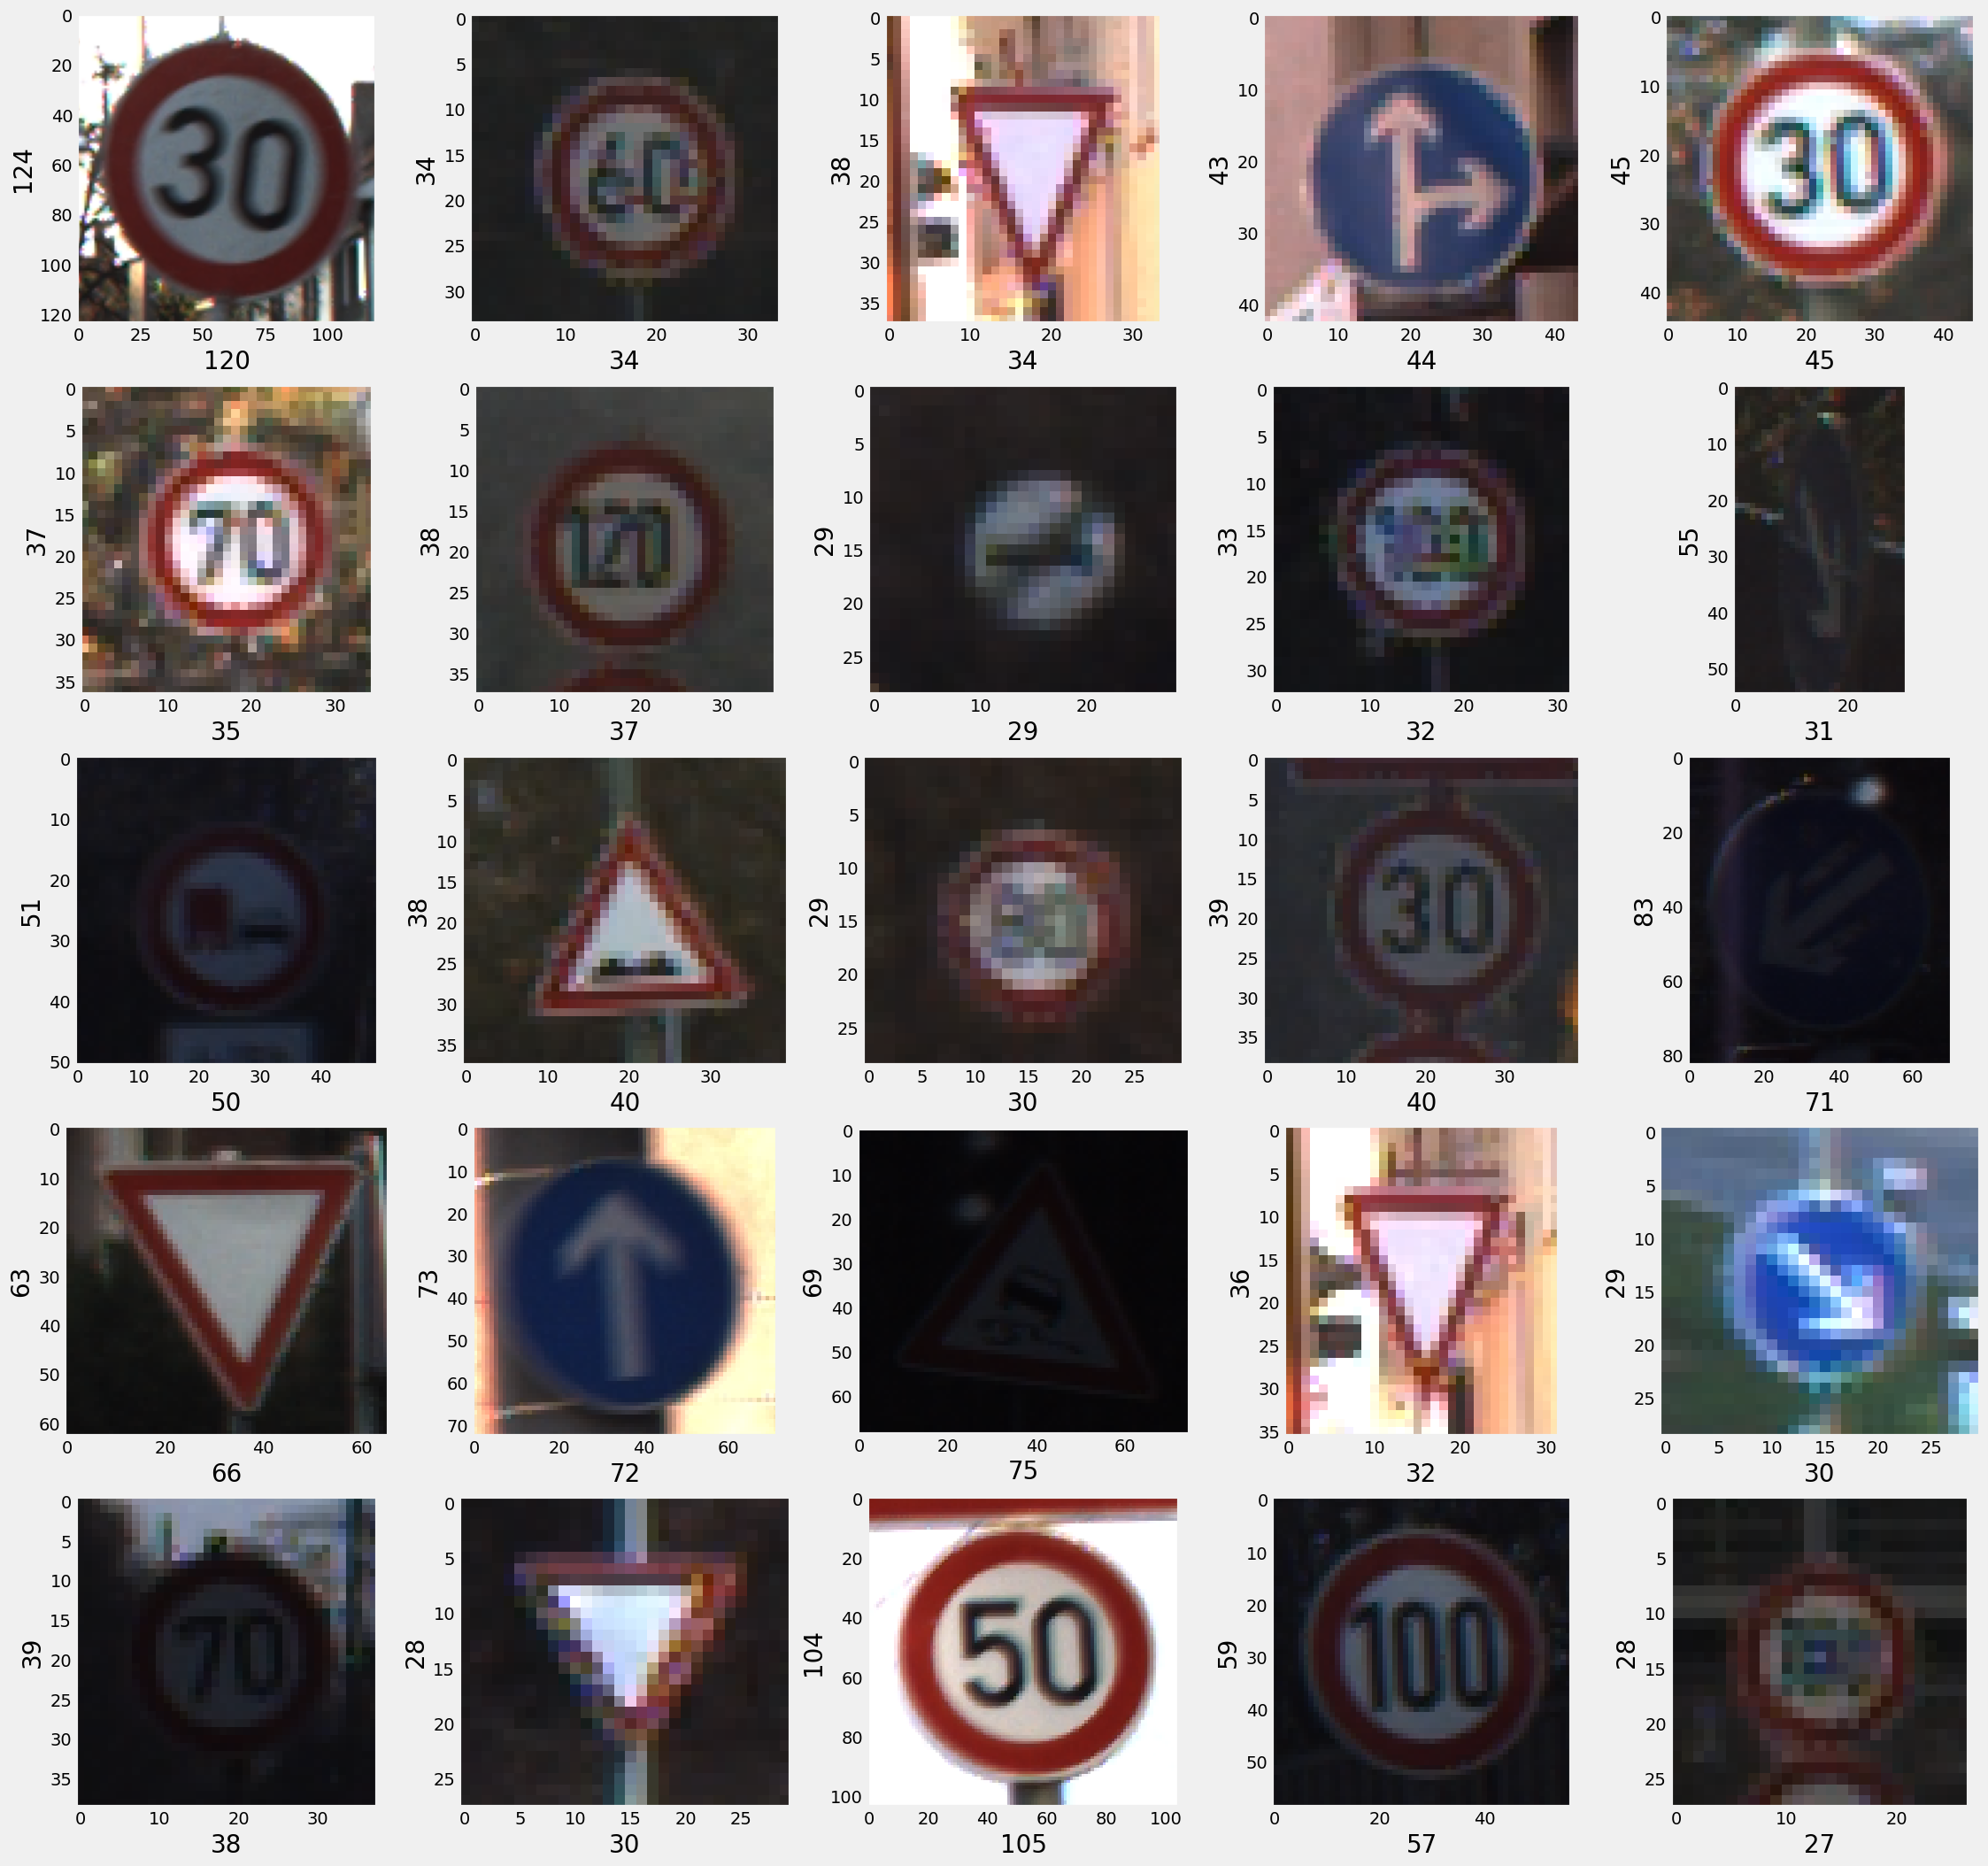

In [38]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(dataset_path + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = dataset_path + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=False)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [42]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)
            image = image.resize((IMG_HEIGHT, IMG_WIDTH))

            image_data.append(np.array(image))
            image_labels.append(i)
        except Exception as e:
            print("Error loading image:", img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)

print("Image data shape:", image_data.shape)
print("Image labels shape:", image_labels.shape)


Image data shape: (39209, 30, 30, 3)
Image labels shape: (39209,)


In [43]:
#Shuffling the training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [44]:
#Splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [45]:
#One hot encoding the labels
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [46]:
#Making the model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu',
                        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(43, activation='softmax')
])


In [49]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [51]:
lr = 0.001
epochs = 30

# In recent Keras/TensorFlow versions, use 'learning_rate' instead of 'lr'.
# The 'decay' argument is also no longer a direct parameter of the Adam constructor.
# For learning rate decay, consider using tf.keras.optimizers.schedules.
opt = Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [52]:
#Augmenting the data and training the model
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.3728 - loss: 2.3504 - val_accuracy: 0.8706 - val_loss: 0.4265
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.8009 - loss: 0.6217 - val_accuracy: 0.9390 - val_loss: 0.2023
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8928 - loss: 0.3428 - val_accuracy: 0.9498 - val_loss: 0.1483
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.9211 - loss: 0.2485 - val_accuracy: 0.9760 - val_loss: 0.0728
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9332 - loss: 0.2088 - val_accuracy: 0.9668 - val_loss: 0.1024
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.9428 - loss: 0.1864 - val_accuracy: 0.9790 - val_loss: 0.0657
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - accuracy: 0.9474 - loss: 0.1672 - val_accuracy: 0.9814 - val_loss: 0.0604
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 63s 74ms/step - accuracy: 0.9544 - loss: 0.1469 - val_accurac

In [53]:
model.save("model.h5")

In [59]:
from google.colab import drive
drive.mount('/content/drive')

import os
output_dir = "/content/drive/MyDrive/Colab_Notebook/TSF/Traffic_sign_classification"
os.makedirs(output_dir, exist_ok=True)

model.save_weights(os.path.join(output_dir, "model.weights.h5"))

Mounted at /content/drive


In [60]:
dir(aug)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standardize'

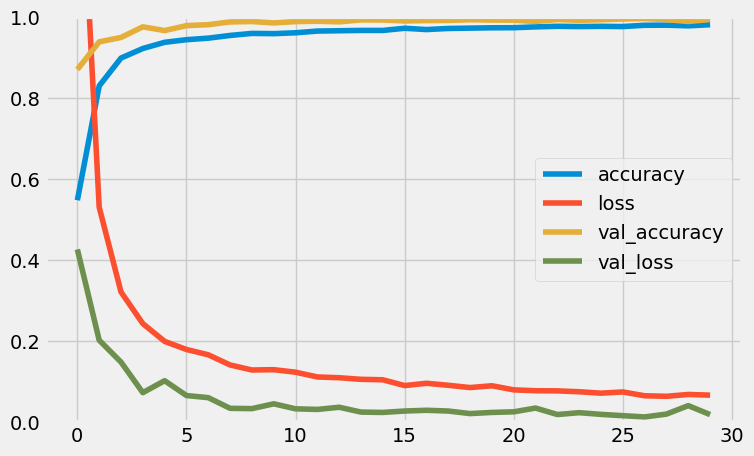

In [61]:
#Evaluating the model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
#Loading the test data and running the predictions
test = pd.read_csv(dataset_path + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(dataset_path + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

/tmp/ipython-input-713330619.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')
/tmp/ipython-input-713330619.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')
/tmp/ipython-input-713330619.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')
/tmp/ipython-input-713330619.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')
/tmp/ipython-input-713330619.py:12: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')
/tmp/ipython-input-713330619.py:12: DeprecationWarning: 'mode' parameter is deprecate

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Test Data accuracy:  55.99366587490103


In [64]:
#Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<Axes: >

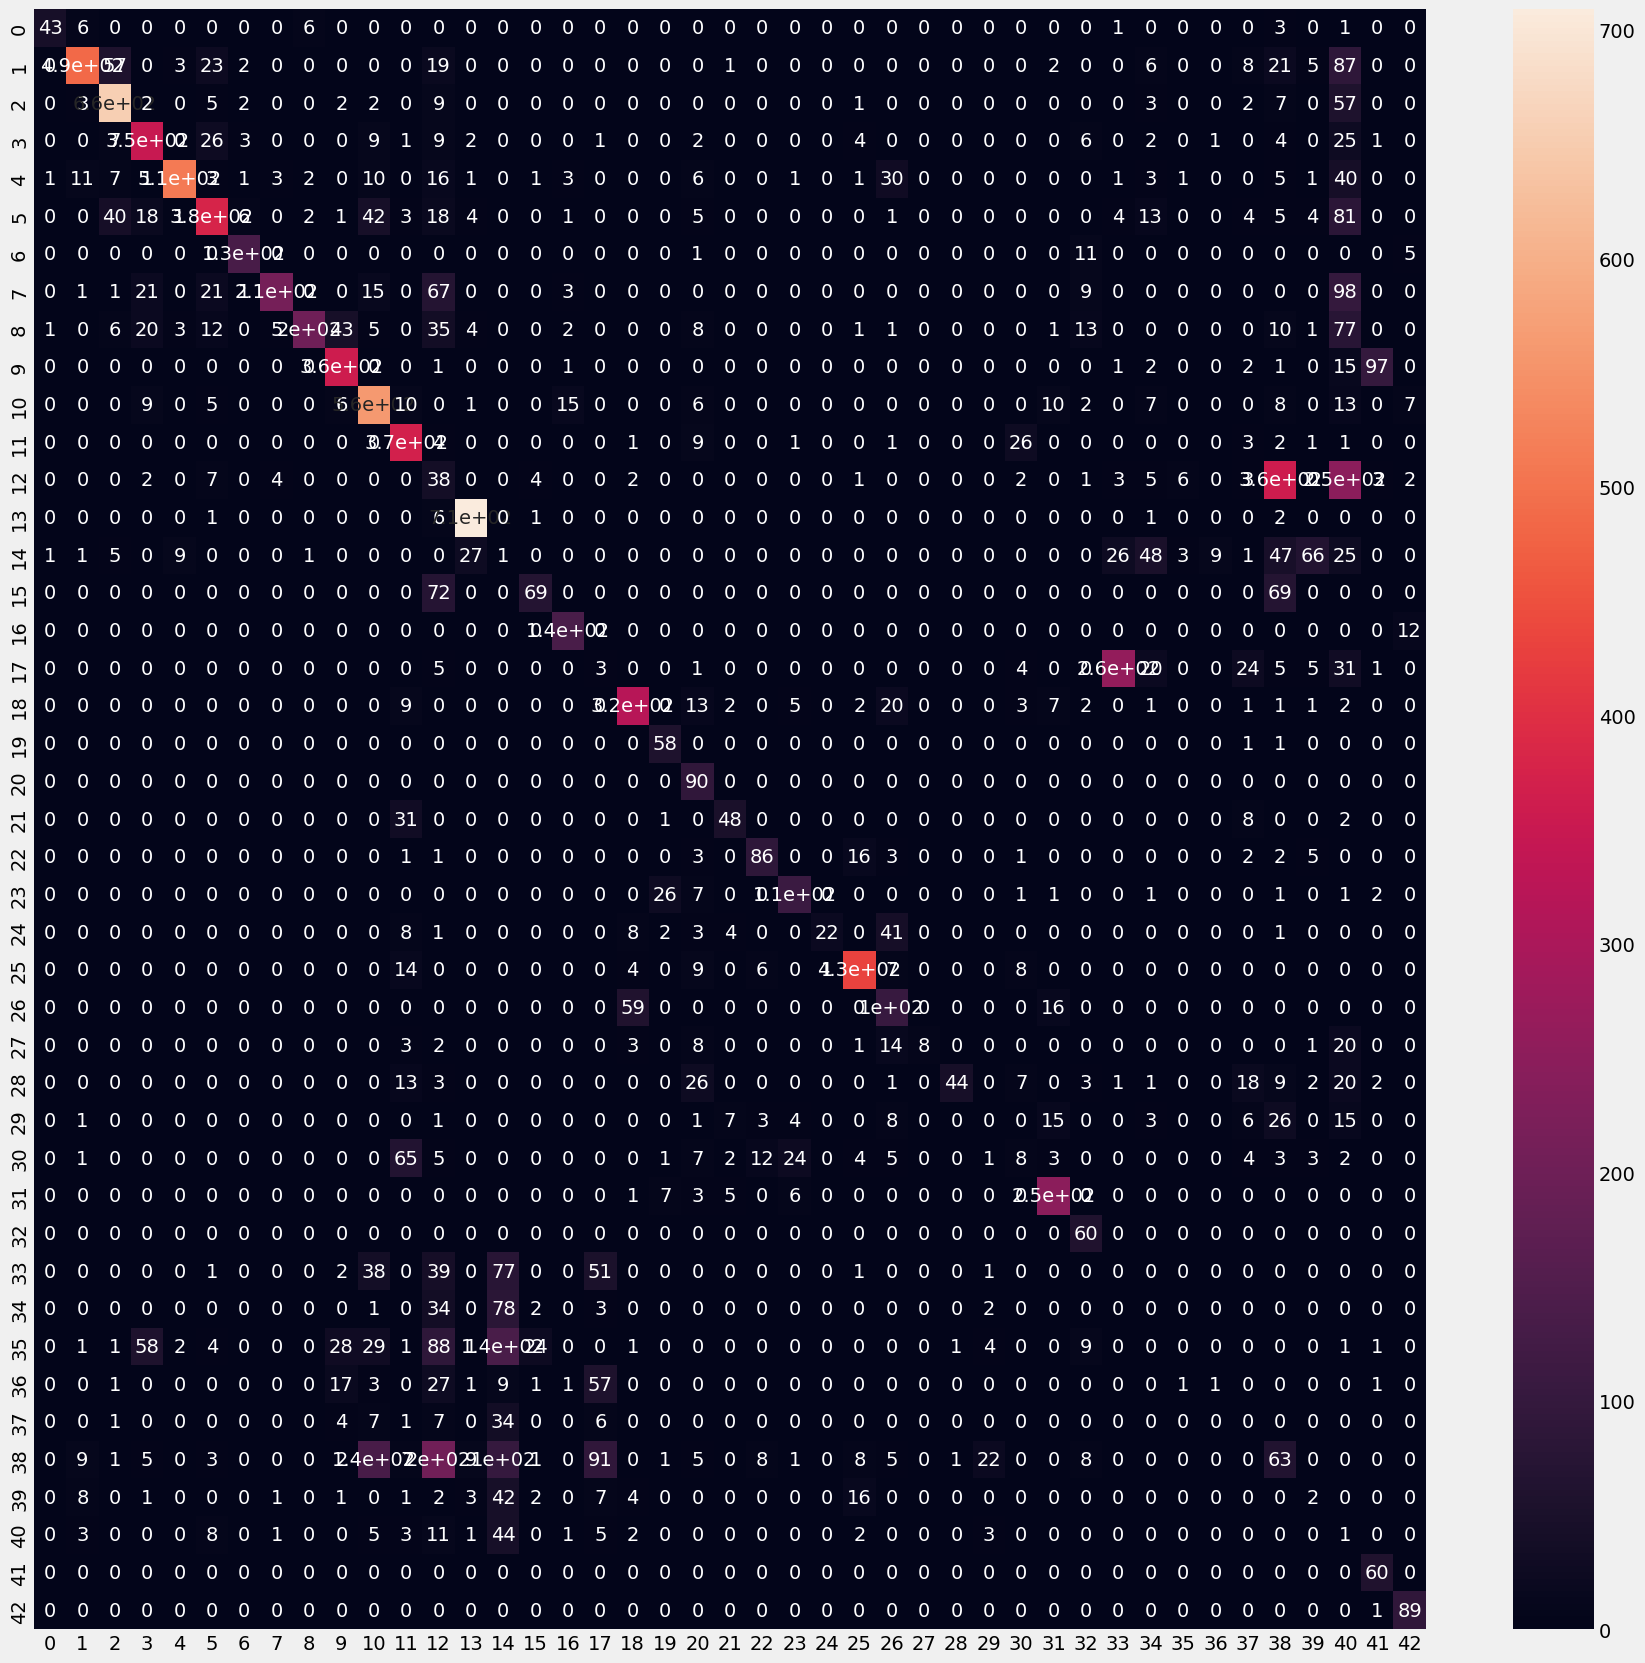

In [65]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [66]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        60
           1       0.92      0.68      0.78       720
           2       0.84      0.87      0.86       750
           3       0.72      0.77      0.74       450
           4       0.97      0.77      0.86       660
           5       0.76      0.60      0.67       630
           6       0.90      0.89      0.89       150
           7       0.94      0.47      0.63       450
           8       0.95      0.45      0.61       450
           9       0.77      0.75      0.76       480
          10       0.65      0.85      0.74       660
          11       0.68      0.88      0.77       420
          12       0.05      0.06      0.05       690
          13       0.93      0.98      0.96       720
          14       0.00      0.00      0.00       270
          15       0.66      0.33      0.44       210
          16       0.84      0.92      0.88       150
          17       0.01    

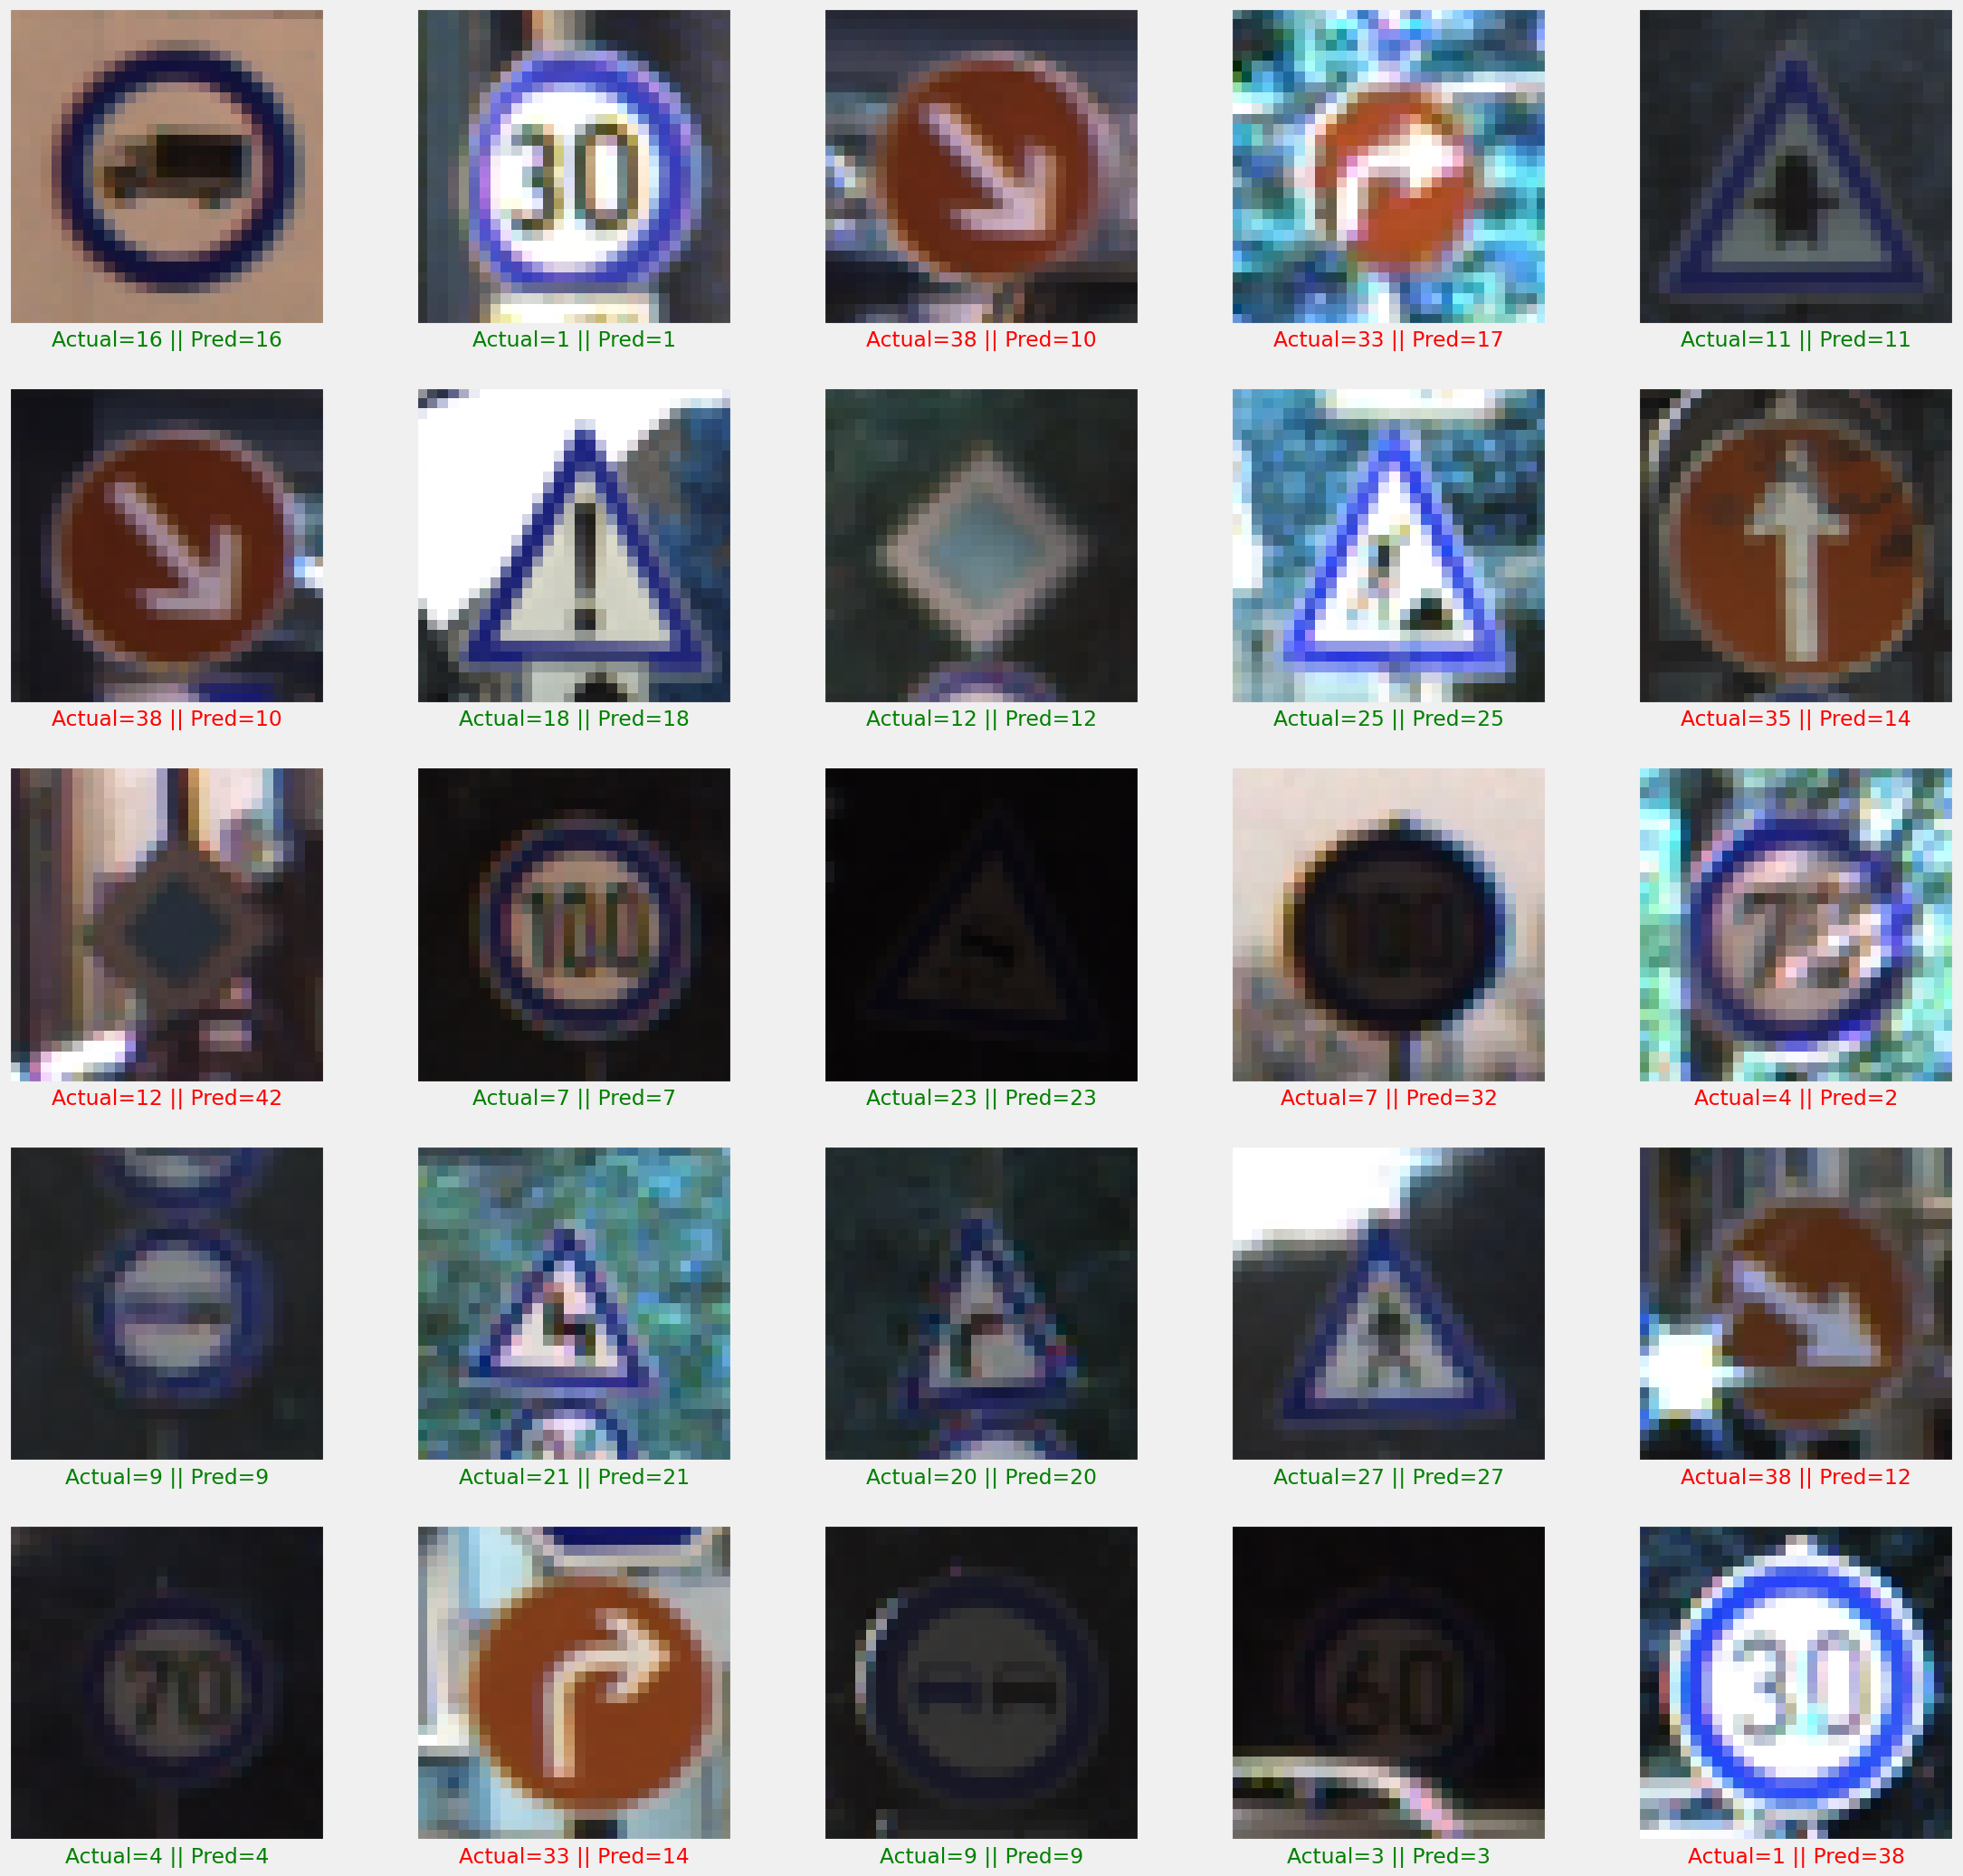

In [67]:
#Predictions on Test Data
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [68]:
ls

archive.zip  drive/  model.h5  sample_data/


In [70]:
model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import os # Import os for path joining

# Load the first image from the test set using the correct path
# The 'imgs' variable contains relative paths like 'Test/00000.png'
# 'dataset_path' contains the base directory for the dataset
image_path_to_predict = os.path.join(dataset_path, imgs[0]) # Use the first image from the 'imgs' array
image = cv2.imread(image_path_to_predict)

# Ensure the image was loaded correctly before proceeding
if image is None:
    print(f"Error: Could not load image from {image_path_to_predict}")
else:
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    expand_input = np.expand_dims(resize_image,axis=0)
    input_data = np.array(expand_input)
    input_data = input_data/255

    pred = loaded_model.predict(input_data)
    result = pred.argmax()
    print(f"Predicted class for {image_path_to_predict}: {result}")
    print(f"Actual class for {image_path_to_predict}: {labels[0]}") # Assuming labels[0] corresponds to imgs[0]

/tmp/ipython-input-759846761.py:18: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image_fromarray = Image.fromarray(image, 'RGB')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted class for /kaggle/input/gtsrb-german-traffic-sign/Test/00000.png: 16
Actual class for /kaggle/input/gtsrb-german-traffic-sign/Test/00000.png: 16
